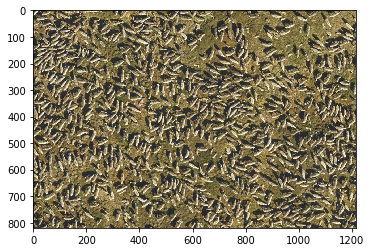

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("datasets/images/caribou.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

#TODO: write some code here that will produce a picture much closer to expected

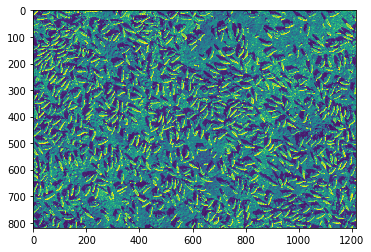

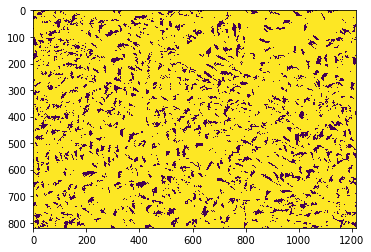

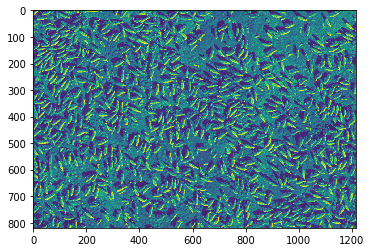

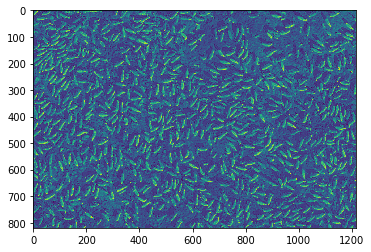

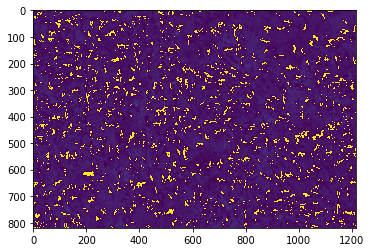

In [2]:
# 1. display separate colour components

# SILLY STUFF
red_minus_green = img[:,:,0] - img[:,:,1]
plt.imshow(img[:,:,0])
plt.show()
plt.imshow(img[:,:,0] > 50)
plt.show()
plt.imshow(img[:,:,1])
plt.show()
plt.imshow(img[:,:,2])
plt.show()
plt.imshow(red_minus_green)
plt.show()

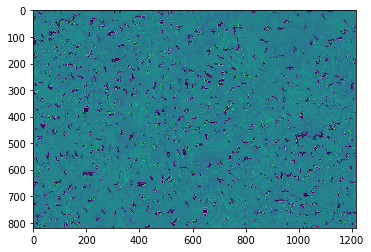

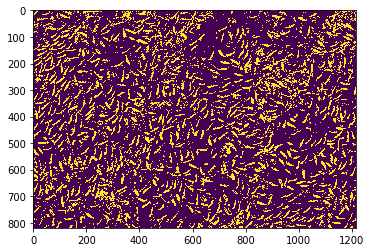

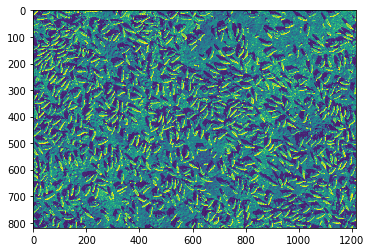

In [3]:
# 2. convert to HSV space and display separate components

# SILLY STUFF
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_plus_red_minus_green = hsv[:,:,0] + red_minus_green
plt.imshow(hue_plus_red_minus_green)
plt.show()
plt.imshow((hsv[:,:,2] > 160))
plt.show()
plt.imshow(hsv[:,:,2])
plt.show()

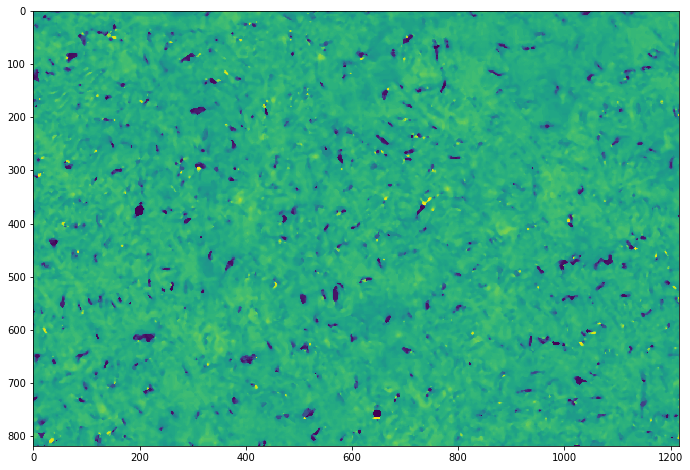

In [4]:
# 3. apply filtering (median, uniform, Gaussian) if needed

# SILLY STUFF
median = cv2.medianBlur(hue_plus_red_minus_green, 7)
plt.figure(figsize=(16,8))
plt.imshow(median)
plt.show()

Centers: [109 109 109] [43 41 43]


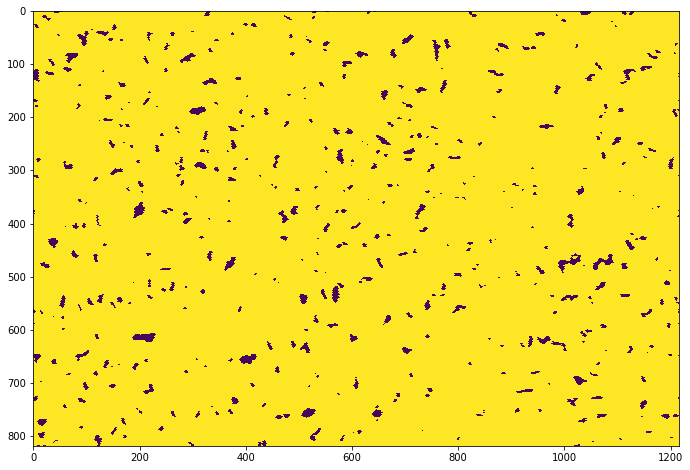

In [5]:
######################################## place better image here ############################################
better_image = median


Z = np.float32(better_image.reshape((-1,3))) # list of just point colors, line by line
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) # algorithm stop condition

K = 2  # number of clusters
# clustering is discussed here: https://docs.opencv.org/3.1.0/d1/d5c/tutorial_py_kmeans_opencv.html
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

center = np.uint8(center)  # colors which are considered as centers of clusters
print("Centers:", *center)

# label stores class labels for each point provided for clustering
res = center[label.flatten()].reshape((better_image.shape)) # and back to image shape
plt.figure(figsize=(16,8))
plt.imshow(res)
plt.show()